<a href="https://colab.research.google.com/github/JSJeong-me/SEMICON-BigData/blob/main/visulaization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Visualization**

In [1]:
# 데이터 처리 패키지
import pandas as pd
# 행렬 연산 패키지
import numpy as np
# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 경고 메시지 처리
import warnings

In [2]:
# 한글설치 (윈도우 버전)
matplotlib.rc('font', family="Malgun Gothic")
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
# 실행결과 경고메시지 출력 제외
warnings.filterwarnings('ignore')

In [3]:
path = "./data/"

In [4]:
df_fitness = pd.read_csv(path+"health.csv", encoding ="euc-kr")

In [5]:
df_currency = pd.read_csv(path+"exchange.csv", parse_dates = ["APPL_DATE"])

In [6]:
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


<AxesSubplot:>

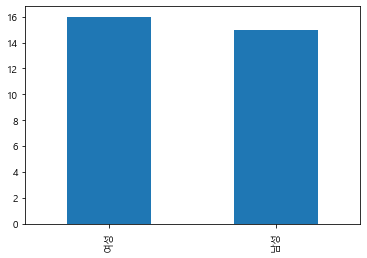

In [7]:
df_count = df_fitness["GENDER"].value_counts()
df_count.plot.bar()

In [8]:
df_count = df_fitness["AGEGROUP"].value_counts()
# sort_index(inplace = True) : 정렬 결과를 저장
df_count.sort_index(inplace = True)

<AxesSubplot:>

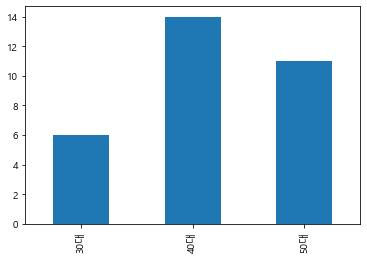

In [9]:
df_count.plot.bar()

<AxesSubplot:xlabel='GENDER,AGEGROUP'>

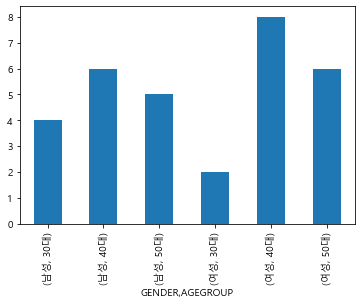

In [10]:
df_groupby_total = df_fitness.groupby(["GENDER", "AGEGROUP"]).size()
df_groupby_total.plot.bar()

<AxesSubplot:ylabel='AGEGROUP'>

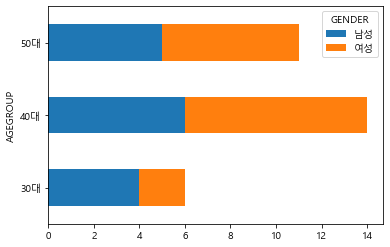

In [11]:
# 누적 막대 그래프
df_groupby_total = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index = False)['WEIGHT'].agg('count')
df_pivot = df_groupby_total.pivot("AGEGROUP", "GENDER", "WEIGHT")
df_pivot.plot(kind = 'barh', stacked = True)

<AxesSubplot:ylabel='AGEGROUP'>

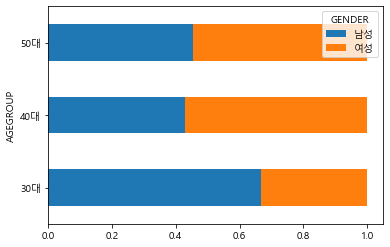

In [12]:
df_pivot_norm = df_pivot.div(df_pivot.sum(1), axis = 0)
df_pivot_norm.plot(kind = 'barh', stacked = True)

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <BarContainer object of 10 artists>)

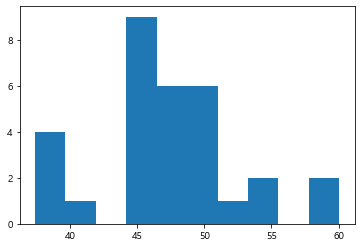

In [13]:
# matplotlib 활용
plt.hist(df_fitness["OXY"])

<AxesSubplot:>

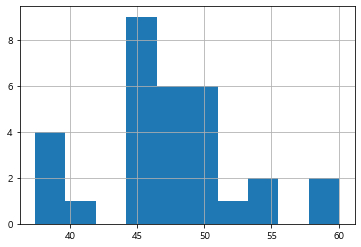

In [14]:
# pandas 활용
df_fitness["OXY"].hist()

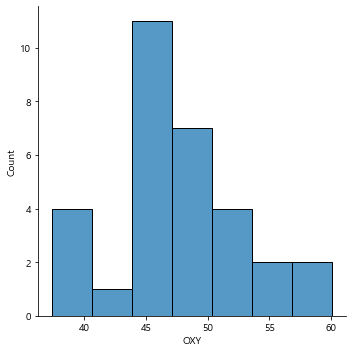

In [15]:
# seaborn 활용
sns.displot(df_fitness, x = "OXY")

<AxesSubplot:xlabel='OXY', ylabel='Count'>

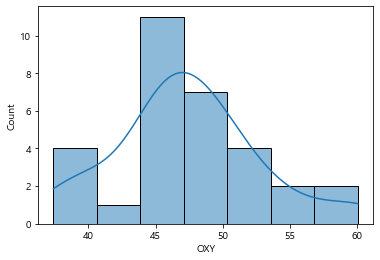

In [16]:
sns.histplot(data = df_fitness, x = 'OXY', kde = True)

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'WEIGHT'}>,
        <AxesSubplot:title={'center':'OXY'}>],
       [<AxesSubplot:title={'center':'RUNTIME'}>,
        <AxesSubplot:title={'center':'RUNPULSE'}>,
        <AxesSubplot:title={'center':'RSTPULSE'}>],
       [<AxesSubplot:title={'center':'MAXPULSE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

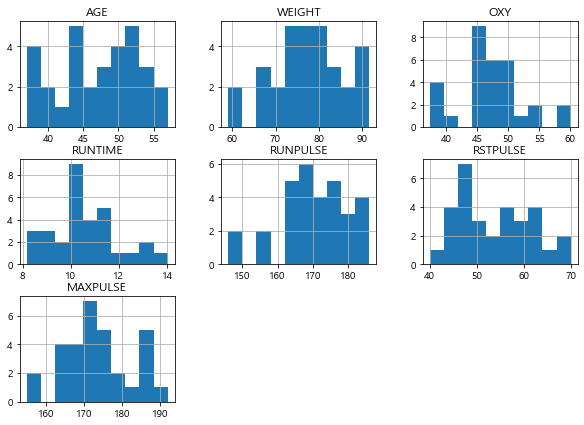

In [17]:
# pandas 활용
# figsize = (x축 크기, y축 크기)
df_fitness.hist(figsize = (10,7))

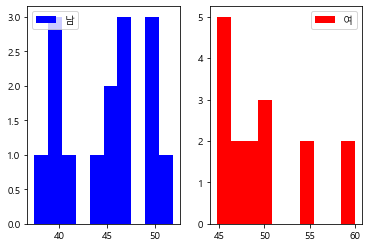

In [18]:
# matplotlib 활용
fig, (ax0, ax1) = plt.subplots(nrows =1, ncols = 2)
x1 = df_fitness[df_fitness["GENDER"] == "남성"]["OXY"]
x2 = df_fitness[df_fitness["GENDER"] == "여성"]["OXY"]
ax0.hist(x1, histtype = 'bar', color = 'blue')
ax1.hist(x2, histtype = 'bar', color= 'red' )
ax0.legend('남성')
ax1.legend('여성')
plt.show()

array([<AxesSubplot:title={'center':'남성'}>,
       <AxesSubplot:title={'center':'여성'}>], dtype=object)

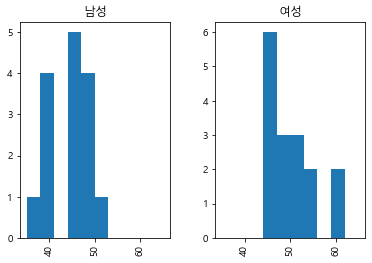

In [19]:
# pandas 활용
# hist(column = 변수, by = 그룹변수, range=(최소값, 최대값))-X축 범위 통일
df_fitness.hist(column="OXY" , by = "GENDER" , range=(35,65))

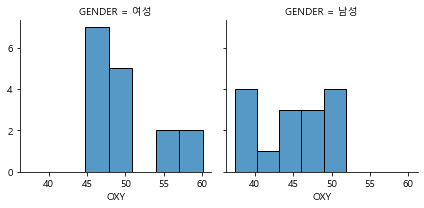

In [20]:
# seaborn 활용. FacetGrid(데이터 지정, col=컬럼 지정)
grid = sns.FacetGrid(df_fitness, col="GENDER")
# map(함수, 컬럼명)
grid.map(sns.histplot, "OXY")

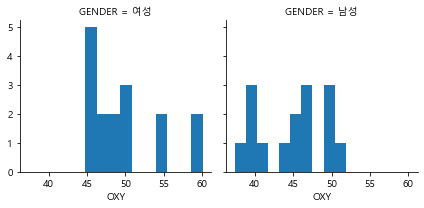

In [21]:
# seaborn 활용. FacetGrid(데이터 지정, col=컬럼 지정)
grid = sns.FacetGrid(df_fitness, col="GENDER")
# 함수로 matplotlib.pyplot 활용
grid.map(plt.hist, "OXY")

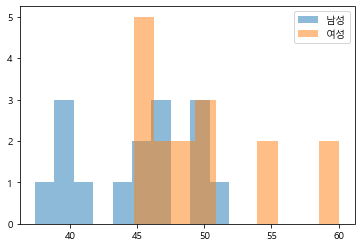

In [22]:
# matplotlib 활용 - hist(변수,label="표시 값" , alpha = 투명도(0~1 지정) )
plt.hist(df_fitness[df_fitness["GENDER"] == "남성"]["OXY"],label = "남성", alpha = 0.5)
plt.hist(df_fitness[df_fitness["GENDER"] == "여성"]["OXY"],label = "여성", alpha = 0.5)
plt.legend()

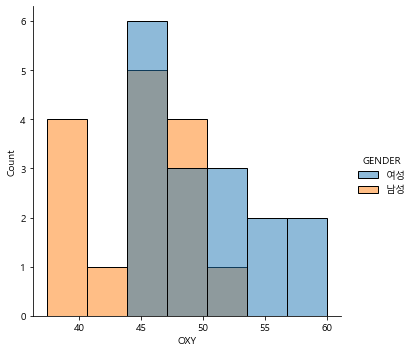

In [23]:
# seaborn 활용
sns.displot(df_fitness, x = 'OXY', hue = 'GENDER')

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <BarContainer object of 20 artists>)

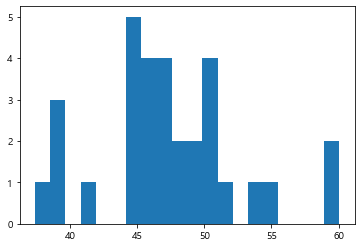

In [24]:
# matplotlib 활용
# x축 구간(bin) 조정(상세 분포 확인)
plt.hist(x = "OXY", data = df_fitness, bins = 20)

<AxesSubplot:title={'center':'OXY'}, xlabel='[GENDER, AGEGROUP]'>

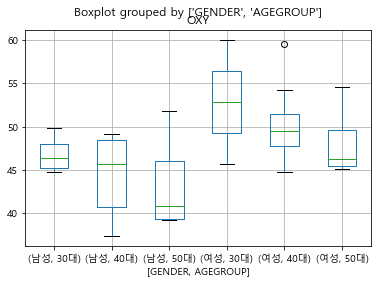

In [25]:
# pandas 활용
df_fitness.boxplot(column="OXY", by = ["GENDER", "AGEGROUP"])

In [26]:
df_count = df_fitness.groupby(["GENDER"] ).size()

([<matplotlib.patches.Wedge at 0x7f25c36aa850>,
 [Text(0.055714135492219465, 1.0985881553641268, '남성'),
  Text(-0.055714238349465386, -1.098588150147788, '여성')],
 [Text(0.030389528450301524, 0.5992299029258873, '48.4%'),
  Text(-0.030389584554253845, -0.5992299000806116, '51.6%')])

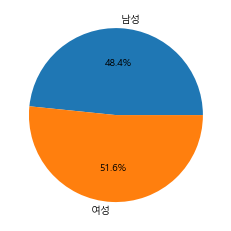

In [27]:
# matplotlib 활용 (데이터, labels=레이블 변수 지정, autopct=비율 %로 표시)
plt.pie(df_count, labels = df_count.index, autopct="%.1f%%")

<AxesSubplot:ylabel='None'>

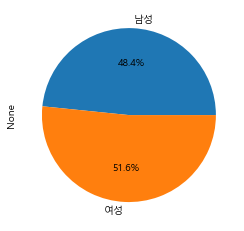

In [28]:
# pandas 활용
df_count.plot.pie(y = "OXY", autopct="%.1f%%")

In [29]:
df_count = df_fitness.groupby(["GENDER", "AGEGROUP"] ).size()

([<matplotlib.patches.Wedge at 0x7f25c363b050>,
 [Text(1.0108535980228326, 0.4337914284126577, "('남성', '30대')"),
  Text(0.166570601230037, 1.0873151497178102, "('남성', '40대')"),
  Text(-0.9028397378807517, 0.6283951047735936, "('남성', '50대')"),
  Text(-1.0943562664864532, -0.11128504841995318, "('여성', '30대')"),
  Text(-0.48443369198771585, -0.9875849320778194, "('여성', '40대')"),
  Text(0.9028396790461523, -0.6283951893035473, "('여성', '50대')")],
 [Text(0.5513746898306359, 0.23661350640690418, '12.9%'),
  Text(0.09085669158002017, 0.5930809907551692, '19.4%'),
  Text(-0.4924580388440463, 0.3427609662401419, '16.1%'),
  Text(-0.5969215999017017, -0.06070093550179264, '6.5%'),
  Text(-0.2642365592660268, -0.5386826902242651, '25.8%'),
  Text(0.4924580067524466, -0.34276101234738937, '19.4%')])

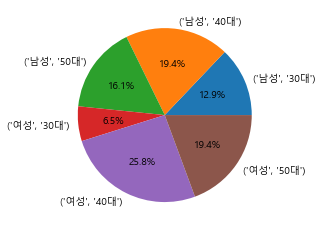

In [30]:
# matplotlib 활용
plt.pie(df_count, labels = df_count.index, autopct="%.1f%%")

<AxesSubplot:ylabel='None'>

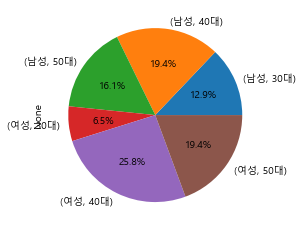

In [31]:
# pandas 활용
df_count.plot.pie(y = "OXY", autopct="%.1f%%")

<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

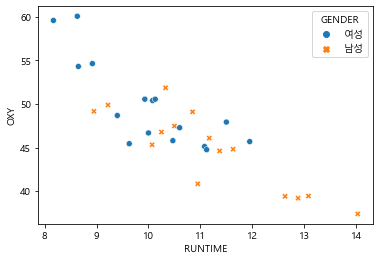

In [32]:
# seaborn 활용
# scatterplot( x, y, hue: 그룹 변수, style : 그룹별 marker 구분 , data )
sns.scatterplot(x = "RUNTIME", y = "OXY", hue = "GENDER", style= "GENDER", data = df_fitness)

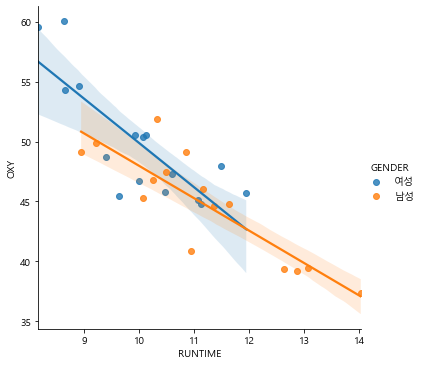

In [33]:
# 회귀선 포함하여 그리기
sns.lmplot(x = "RUNTIME", y = "OXY", hue = "GENDER", data = df_fitness, size = 5)

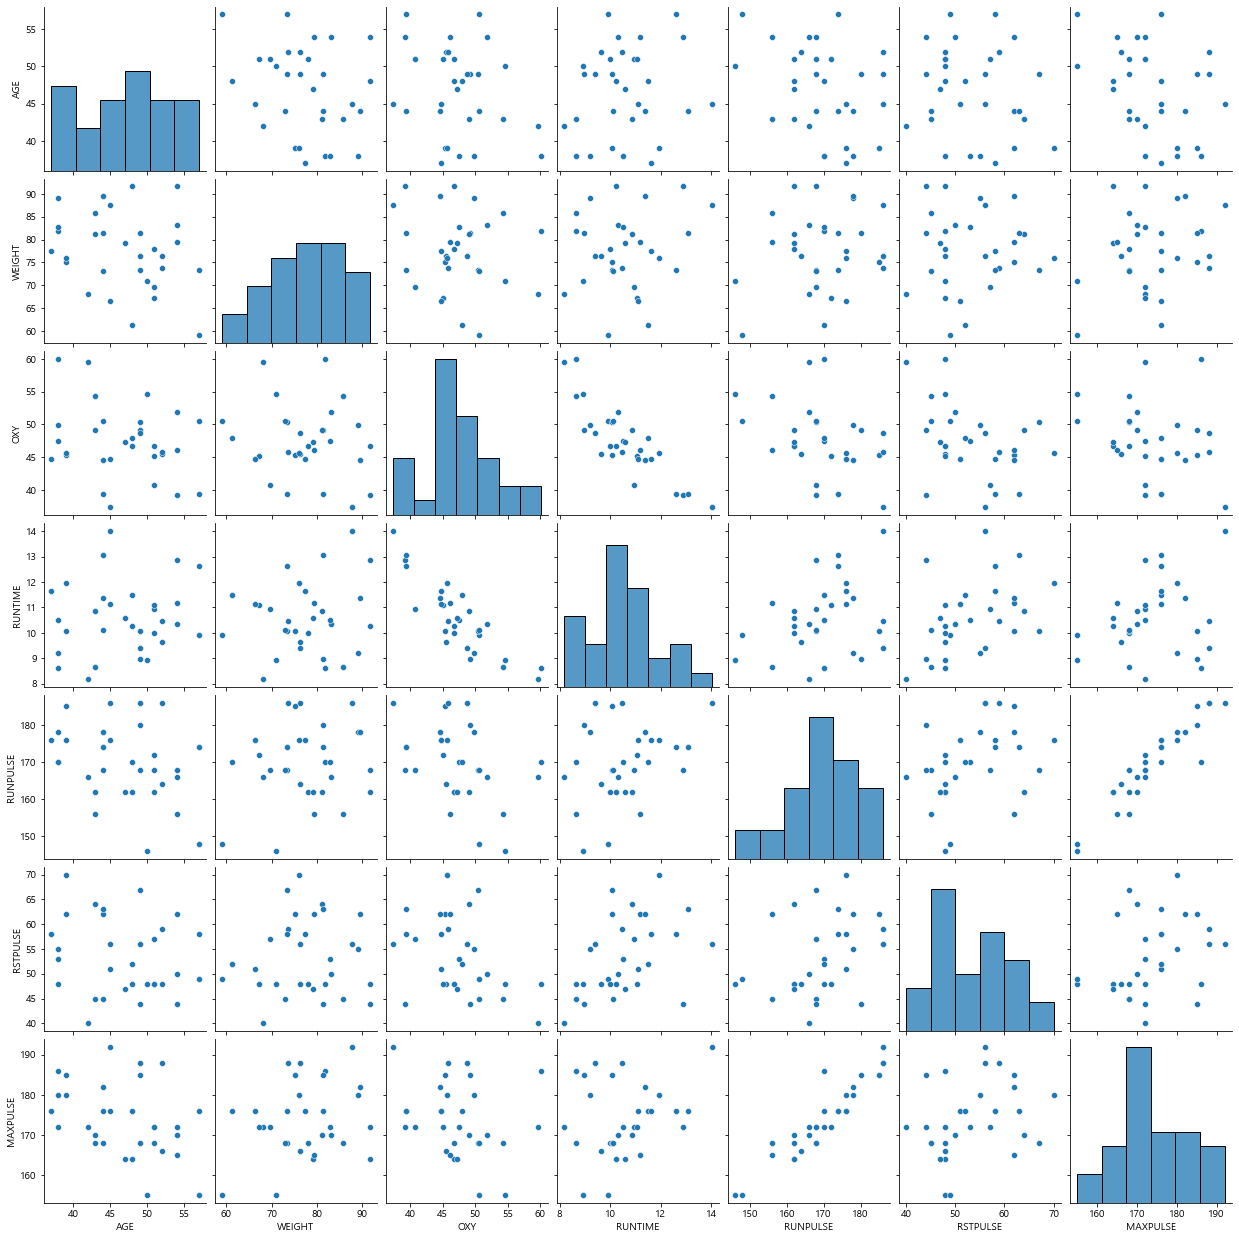

In [34]:
# seaborn 활용
# pairplot(데이터): Scatter Plot 그래프 생성
sns.pairplot(df_fitness)

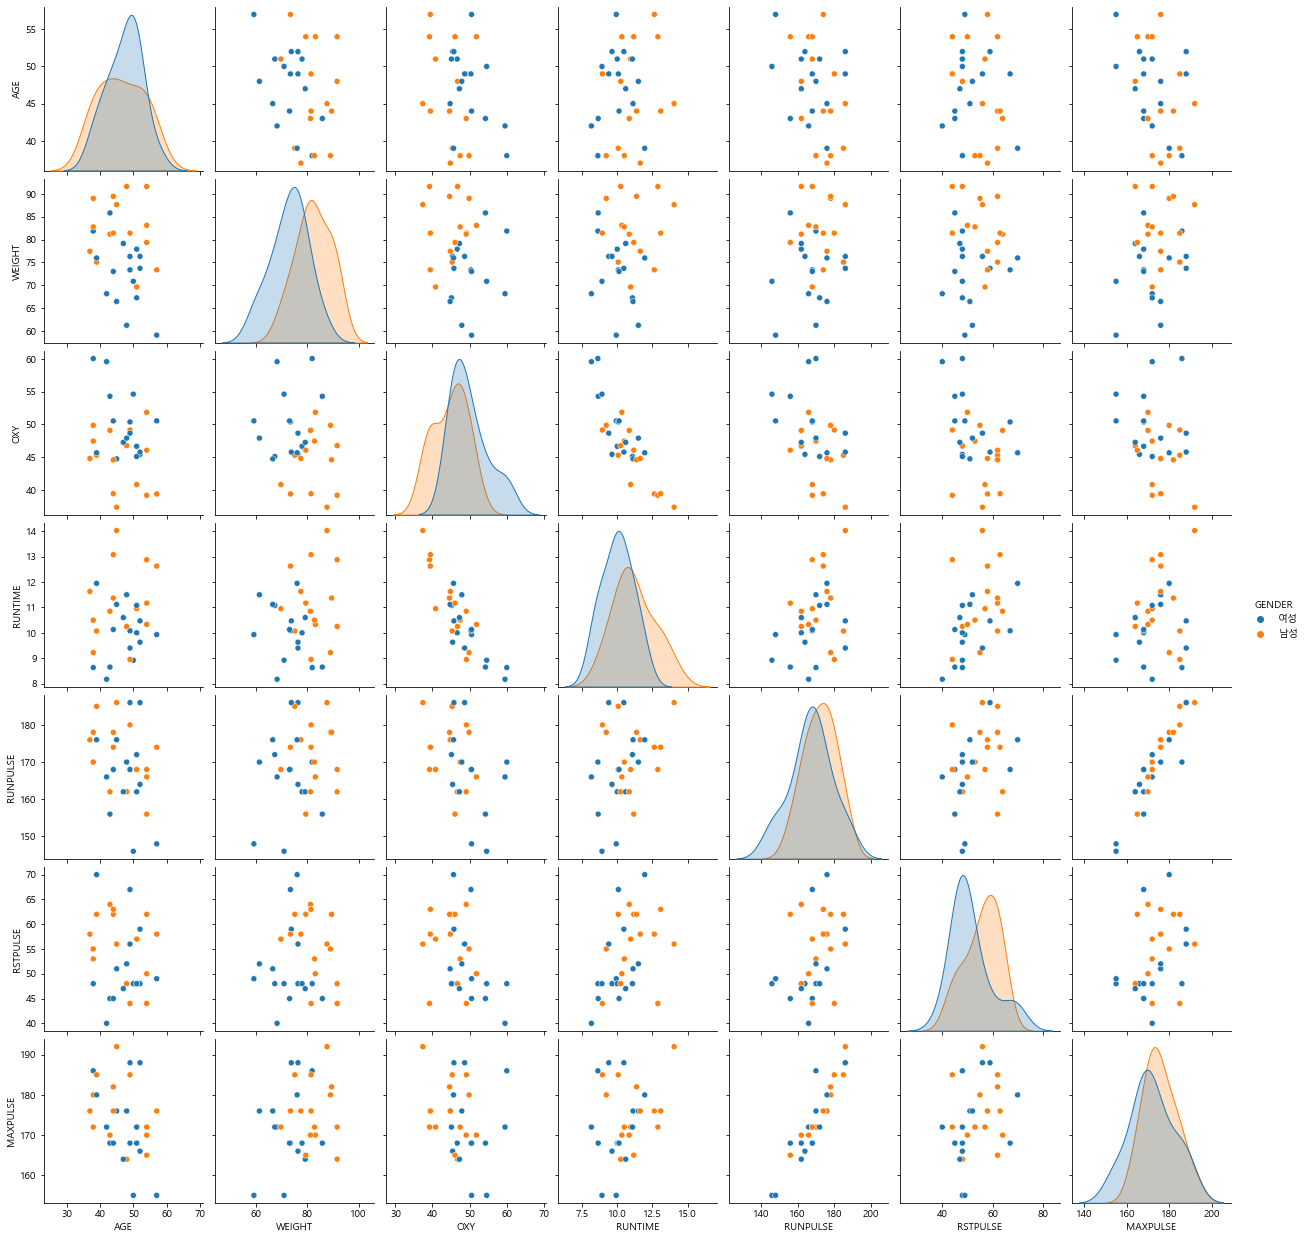

In [35]:
# 성별로 그리기
sns.pairplot(df_fitness, hue = "GENDER")

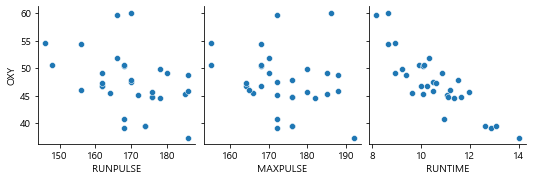

In [36]:
# seaborn 활용
# y변수: 혈당산소 요구량, x변수: 맥박(운동), 맥박(최대), 운동시간 Scatter Matrix 생성
sns.pairplot(df_fitness , y_vars=["OXY"] , x_vars=["RUNPULSE","MAXPULSE","RUNTIME"])

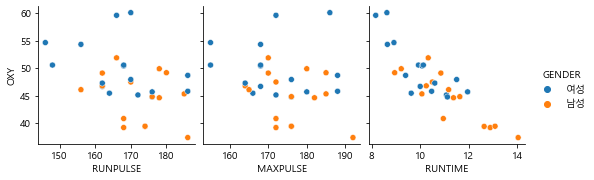

In [37]:
sns.pairplot(df_fitness , y_vars=["OXY"] , x_vars=["RUNPULSE","MAXPULSE","RUNTIME"], hue = 'GENDER')

In [38]:
# pivot 활용하여 각국 통화별 데이터 생성
df_currency_pivot = df_currency.pivot(index = "APPL_DATE", columns="CURRENCY", values = "STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


<AxesSubplot:xlabel='APPL_DATE'>

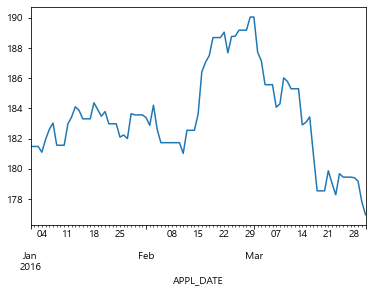

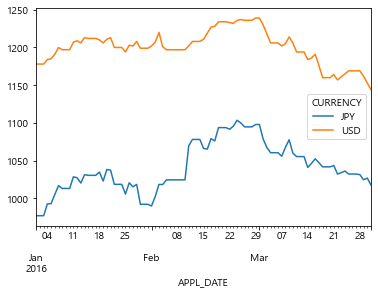

In [39]:
# pandas 활용
# 중국 위안화 그래프 그리기
df_currency_pivot["CNY"].plot()

# 일본 엔화, 미국 달러 그래프 그리기
df_currency_pivot[["JPY", "USD"]].plot()

In [40]:
# 성별과 연령대별 혈당 산소 요구량 평균 계산, groupby: (성별, 연령), agg("mean")
df_agg = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index = False).agg("mean")
# pivot(성별, 연령대, 혈당 산소 요구량): x축(연령대), y축(성별), 값(혈당산소요구량의 평균)으로 pivot
df_pivot = df_agg.pivot("GENDER", "AGEGROUP", "OXY")

<AxesSubplot:xlabel='AGEGROUP', ylabel='GENDER'>

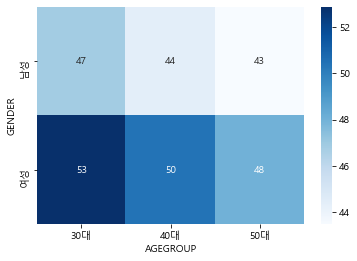

In [41]:
# seaborn 활용 : heatmap(데이터, cmap: 색상)
sns.heatmap(df_pivot, annot = True, cmap="Blues")

<AxesSubplot:>

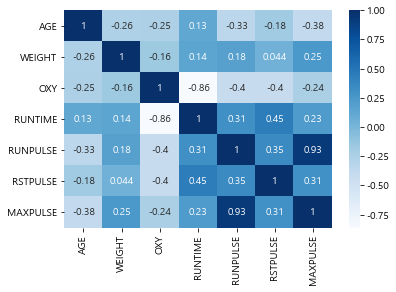

In [42]:
# seaborn 활용
df_cor = df_fitness.corr(method = 'pearson')
sns.heatmap(df_cor, annot = True, cmap="Blues")

<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

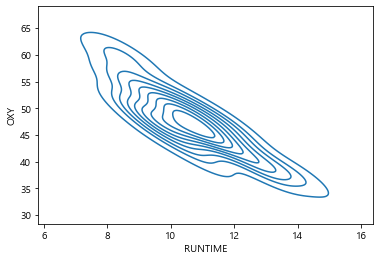

In [43]:
# seaborn 활용 : kdeplot( x축, y축 , shade: 음영 선택 여부)
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shade = False)

<AxesSubplot:>

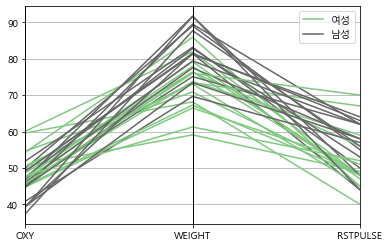

In [44]:
# pandas 활용
# parallel_coordinates(데이터, 그룹 변수, cols = 변수, colormap= 다양한 colormap지정)
pd.plotting.parallel_coordinates(df_fitness,"GENDER", cols=["OXY", "WEIGHT", "RSTPULSE"], colormap="Accent")